### Generates a synthetic binary classification dataset with 100 samples and 2 features, where one feature is informative. The data is well-separated (class_sep=10) and not arranged in a hypercube.**bold text**

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [2]:
import matplotlib.pyplot as plt

Creates a scatter plot of the synthetic dataset with color-coded classes using the 'winter' colormap. The figure size is set to 10x6 inches and point size to 100 for better visibility.

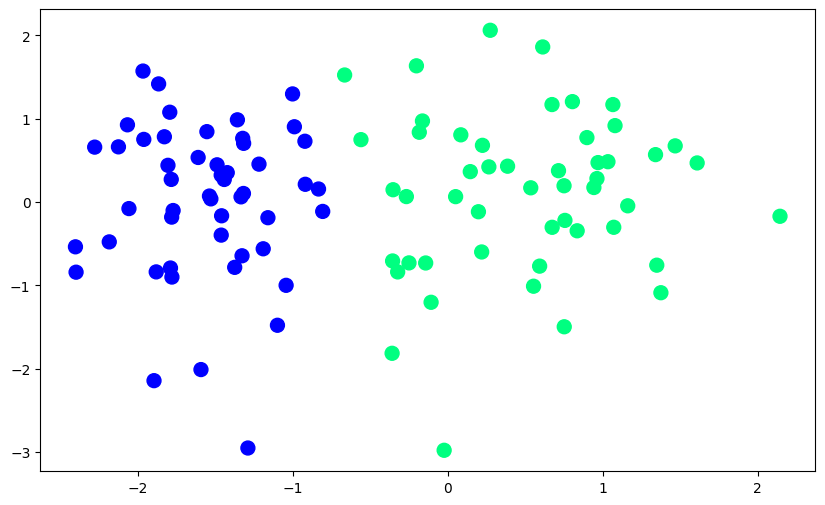

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

Defines a custom Perceptron algorithm that randomly updates weights over 1000 iterations using the step function for binary classification. It returns the learned bias and weight vector.

In [4]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]


In [5]:
def step(z):
    return 1 if z>0 else 0

In [7]:
intercept_,coef_ = perceptron(X,y)

In [8]:
print(coef_)
print(intercept_)

[1.30569987 0.16858237]
1.0


In [9]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

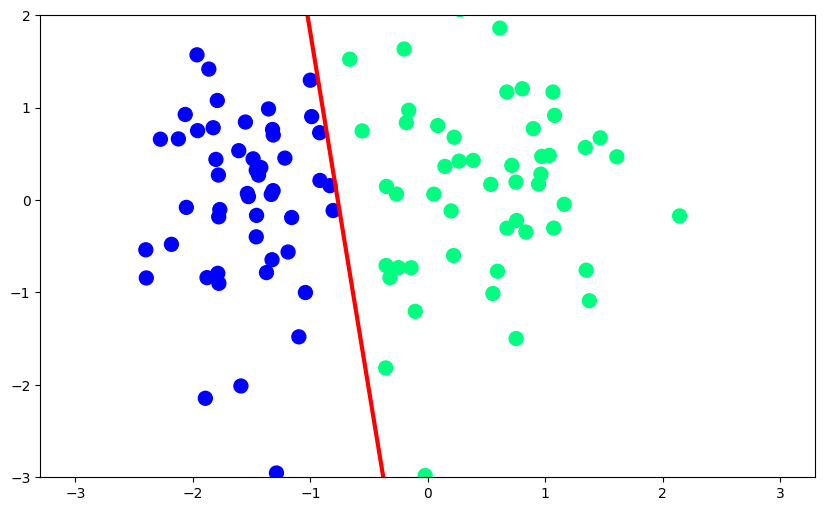

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)